### Required imports

In [1]:
from graphviz import Source
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from urllib.request import urlopen
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets 
import seaborn as sns; sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Methods

In [3]:
def plot_confusion_matrix(
    y_test:pd.core.frame.DataFrame,
    pred_nb:np.array,
    target_labels:list,
):
    mat = confusion_matrix(y_test, pred_nb)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=target_labels, yticklabels=target_labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

## Load Iris dataset

In [4]:
iris = sklearn.datasets.load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#### Build Guassian Classifier

In [5]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, y_train)

# Predict Output 
pred = model.predict(X_test)

#### Build confusion matrix

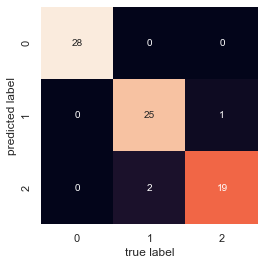

In [6]:
names = np.unique(pred)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, pred, names)

## Human Activity Recognition, or HAR for short
Refers to the problem of predicting what a person is doing based on a trace of their movement using sensors.
Movements are often normal indoor activities such as standing, sitting, jumping, and going up stairs.
Sensors are often located on the subject, such as a smartphone or vest, and often record accelerometer data in three dimensions (x, y, z).
Human Activity Recognition (HAR) aims to identify the actions carried out by a person given a set of observations of him/herself and the surrounding environment. Recognition can be accomplished by exploiting the information retrieved from various sources such as environmental or body-worn sensors.

— A Public Domain Dataset for Human Activity Recognition Using Smartphones, 2013.

### Download the dataset

In [7]:
url_dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

zipresp = urlopen(url_dataset)
tempzip = open('tempfile.zip', 'wb')
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile('tempfile.zip')
zf.extractall(path = 'dataset/')
zf.close()

In [8]:
# Load columns names
fread = open('dataset/UCI HAR Dataset/features.txt', 'r')
columns = fread.readlines()
columns = [col\
           .replace('\n', '')\
           .replace('(', '')\
           .replace(')', '')\
           .replace('-', '_')\
           .replace(',', '_')\
           .lower().split()[1] for col in columns]
fread.close()

In [9]:
fread = open('dataset/UCI HAR Dataset/activity_labels.txt', 'r')
target_labels = fread.readlines()
target_labels = [col\
                 .replace('\n', '')\
                 .replace('(', '')\
                 .replace(')', '')\
                 .replace('-', '_')\
                 .replace(',', '_').lower().split()[1] for col in target_labels]

In [10]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe

X = load_file('dataset/UCI HAR Dataset/train/X_train.txt')
X.columns = columns
y = load_file('dataset/UCI HAR Dataset/train/y_train.txt')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Run a diverse set of nonlinear and ensemble machine learning algorithms

Nonlinear Algorithms:

    Classification and Regression Tree
    Support Vector Machine
    Naive Bayes

Ensemble Algorithms:

    Bagged Decision Trees
    Random Forest
    Extra Trees

In [11]:
# import models

# nonlinear models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import BaggingClassifier

# Build a predictive model using Gaussian Naive Bayes
- No need to to parameter tunning; use default values

In [12]:
model_nb = GaussianNB()

model_nb.fit(X_train,
             y_train)

pred_nb = model_nb.predict(X_test)

### Run classification report and plot confusion matrix

In [13]:
print(classification_report(y_true=y_test,
                            y_pred=pred_nb,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.93      0.73      0.82       606
  walking_upstairs       0.66      0.91      0.77       532
walking_downstairs       0.82      0.79      0.81       508
           sitting       0.53      0.82      0.64       648
          standing       0.84      0.74      0.79       676
            laying       0.99      0.52      0.68       706

          accuracy                           0.74      3676
         macro avg       0.79      0.75      0.75      3676
      weighted avg       0.80      0.74      0.75      3676



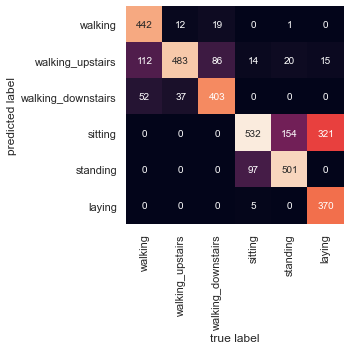

In [14]:
plot_confusion_matrix(y_test, pred_nb, target_labels)

# Tune your Gaussian Naive Bayes
- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

[Sklearn Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

### Question: Explain in your own words what do you think var_smoothing is doing

### Answer: 
Naive Bayes uses the a Gaussian distribution which attributes more weights to the samples closer to the distribution mean.
This might or might not be appropriate depending if what you want to predict follows a normal distribution.

This parameter (var_smoothing) allows to add distribution variance (default value is taken from the training dataset) which essencially widens/smooths the curve by taking into account samples that are further away from the distribution mean.

### Now, tune your model and see if you can improve the model's performance

In [15]:
model_nb = GaussianNB()

params_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_nb = GridSearchCV(estimator=model_nb,
                        param_grid=params_nb,
                        cv=5,
                        verbose=1,
                        scoring='precision'
                       ) 
grid_nb.fit(X_train,
            y_train)

grid_nb.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.0}

In [16]:
pred_nb = grid_nb.predict(X_test)

## Run classification report and see improvement

In [17]:
print(classification_report(y_true=y_test,
                            y_pred=pred_nb,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.80      0.84      0.82       606
  walking_upstairs       0.74      0.91      0.81       532
walking_downstairs       0.92      0.66      0.76       508
           sitting       0.98      0.50      0.66       648
          standing       0.68      0.99      0.81       676
            laying       0.99      0.99      0.99       706

          accuracy                           0.82      3676
         macro avg       0.85      0.81      0.81      3676
      weighted avg       0.85      0.82      0.81      3676



# Build a predictive model using SVM
- try a linear and non-linear kernel
- no need to normalize the data because is already prepared

In [18]:
model_linear_svm = SVC(kernel='linear')

model_linear_svm.fit(X_train,
                     y_train)

SVC(kernel='linear')

In [19]:
pred_linear_svm = model_linear_svm.predict(X_test)

In [20]:
print(classification_report(y_true=y_test,
                            y_pred=pred_linear_svm,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.99      1.00      1.00       606
  walking_upstairs       1.00      0.99      0.99       532
walking_downstairs       0.99      0.99      0.99       508
           sitting       0.95      0.93      0.94       648
          standing       0.93      0.95      0.94       676
            laying       1.00      1.00      1.00       706

          accuracy                           0.98      3676
         macro avg       0.98      0.98      0.98      3676
      weighted avg       0.98      0.98      0.98      3676



In [21]:
model_nonlinear_svm = SVC(kernel='rbf')

model_nonlinear_svm.fit(X_train,
                        y_train)

pred_nonlinear_svm = model_nonlinear_svm.predict(X_test)

print(classification_report(y_true=y_test,
                            y_pred=pred_nonlinear_svm,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.99      0.99      0.99       606
  walking_upstairs       0.98      0.98      0.98       532
walking_downstairs       0.99      0.98      0.99       508
           sitting       0.93      0.88      0.90       648
          standing       0.89      0.94      0.91       676
            laying       1.00      1.00      1.00       706

          accuracy                           0.96      3676
         macro avg       0.96      0.96      0.96      3676
      weighted avg       0.96      0.96      0.96      3676



# Build a predictive model using Decision Trees
- Parameter tuning for max depth from 2 to 4
- Min sample nodes to split from 20% to 40%

In [22]:
model_dt = DecisionTreeClassifier(random_state=42)

params_dt = {
    'max_depth': list(range(2, 8)),
    'min_samples_split': [0.2, 0.3, 0.4],
}

grid_dt = GridSearchCV(estimator=model_dt,
                       param_grid=params_dt,
                       cv=5,
                       verbose=1,
                       scoring='accuracy'
                      ) 
grid_dt.fit(X_train,
            y_train)

grid_dt.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 4, 'min_samples_split': 0.2}

In [23]:
pred_dt = grid_dt.predict(X_test)

print(classification_report(y_true=y_test,
                            y_pred=pred_dt,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.81      0.86      0.83       606
  walking_upstairs       0.77      0.79      0.78       532
walking_downstairs       0.90      0.80      0.84       508
           sitting       0.86      0.91      0.89       648
          standing       0.90      0.86      0.88       676
            laying       1.00      1.00      1.00       706

          accuracy                           0.88      3676
         macro avg       0.87      0.87      0.87      3676
      weighted avg       0.88      0.88      0.88      3676



In [24]:
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train,
            y_train)

pred_dt = model_dt.predict(X_test)

print(classification_report(y_true=y_test,
                            y_pred=pred_dt,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.89      0.92      0.91       606
  walking_upstairs       0.89      0.87      0.88       532
walking_downstairs       0.92      0.88      0.90       508
           sitting       0.91      0.92      0.91       648
          standing       0.91      0.92      0.91       676
            laying       1.00      1.00      1.00       706

          accuracy                           0.92      3676
         macro avg       0.92      0.92      0.92      3676
      weighted avg       0.92      0.92      0.92      3676



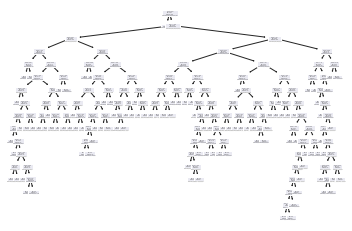

In [25]:
# Other visualisations
tree.plot_tree(model_dt);

In [26]:
'''
tree.plot_tree(model_dt,
               feature_names = columns, 
               class_names = target_labels,
               filled = True);
'''

'\ntree.plot_tree(model_dt,\n               feature_names = columns, \n               class_names = target_labels,\n               filled = True);\n'

In [27]:
'''
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize = (4,4),
                         dpi=800)

tree.plot_tree(model_dt,
               feature_names = columns, 
               class_names=target_labels,
               filled = True);

fig.savefig('decision_tree.png')
'''

"\nfig, axes = plt.subplots(nrows = 1,\n                         ncols = 1,\n                         figsize = (4,4),\n                         dpi=800)\n\ntree.plot_tree(model_dt,\n               feature_names = columns, \n               class_names=target_labels,\n               filled = True);\n\nfig.savefig('decision_tree.png')\n"

In [28]:
tree.export_graphviz(model_dt,
                     out_file = 'tree.dot',
                     feature_names = columns, 
                     class_names = target_labels,
                     filled = True)

# Load the file in the notebook
#Source.from_file('tree.dot')

### BaggingClassifier
- Run 200 Decision Trees with 50 samples each and with bootstrapping

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators = 200,
    max_samples = 50,
    bootstrap=True,
    random_state=42
)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [30]:
print(classification_report(y_true=y_test,
                            y_pred=pred_dt,
                            target_names=target_labels))

                    precision    recall  f1-score   support

           walking       0.89      0.92      0.91       606
  walking_upstairs       0.89      0.87      0.88       532
walking_downstairs       0.92      0.88      0.90       508
           sitting       0.91      0.92      0.91       648
          standing       0.91      0.92      0.91       676
            laying       1.00      1.00      1.00       706

          accuracy                           0.92      3676
         macro avg       0.92      0.92      0.92      3676
      weighted avg       0.92      0.92      0.92      3676



- (?) Same performance as before... what do you think is happening with this data? Try decreasing max_samples... what do you think?